In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
import sys
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
import os
sys.path.append(os.path.abspath(".."))
import src.woe as woe

In [3]:
# Load the balanced dataset
train_balanced = pd.read_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\train_balanced.csv')

In [4]:
# Calculate RFMS Score (Not for modeling, just for analysis)
train_balanced['RFMS_Score'] = (train_balanced['Recency'] * 0.4) + \
                               (train_balanced['Frequency'] * 0.3) + \
                               (train_balanced['Monetary'] * 0.3)

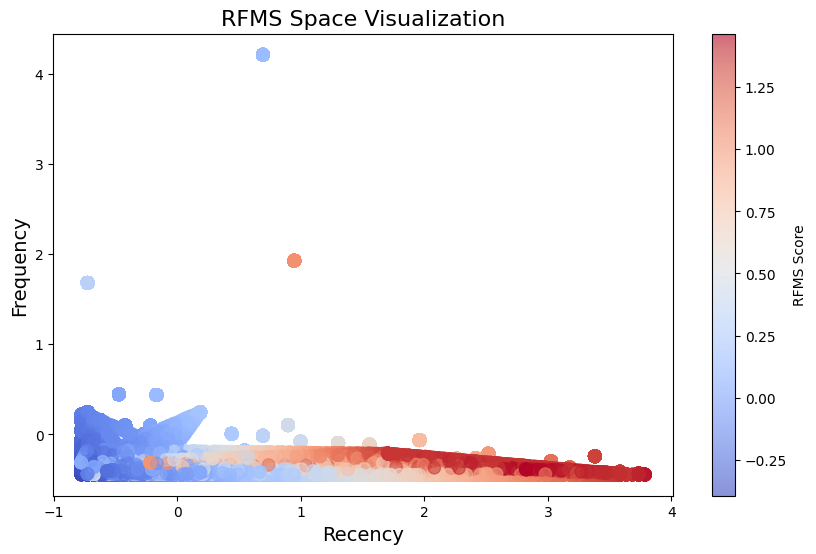

In [5]:
# Visualizing transactions in the RFMS space
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_balanced['Recency'], train_balanced['Frequency'], c=train_balanced['RFMS_Score'], cmap='coolwarm', s=80, alpha=0.6)
plt.title('RFMS Space Visualization', fontsize=16)
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.colorbar(scatter, label='RFMS Score')
plt.show()

In [6]:
# Perform WoE binning on continuous features
continuous_features = ['Amount', 'Recency', 'Frequency', 'Monetary', 'customer_total_amount', 'customer_mean_amount', 
                       'customer_transaction_count', 'customer_amount_std']

for feature in continuous_features:
    train_balanced, _ = woe.calculate_woe(train_balanced, feature, 'FraudResult')

In [7]:
# Check the dataset after binning
train_balanced.head()

,Amount,PricingStrategy,Month,Day,Hour,Weekday,IsWeekend,ProductCategory_Amount_Mean,customer_total_amount,customer_mean_amount,...,binned_Monetary,woe_Monetary,binned_customer_total_amount,woe_customer_total_amount,binned_customer_mean_amount,woe_customer_mean_amount,binned_customer_transaction_count,woe_customer_transaction_count,binned_customer_amount_std,woe_customer_amount_std
0,-0.056453,-0.34828,-1.064909,-0.321961,-0.919098,1.604086,1.959418,0.626597,0.172292,-0.064638,...,"(-0.328, 0.536]",-0.733166,"(-0.328, 0.536]",-0.733166,"(-5.305, 5.667]",-0.490776,"(-0.451, 0.0196]",0.198849,"(-0.239, 3.462]",-0.903691
1,-0.015089,-0.34828,1.040922,0.571105,0.730544,0.531040,-0.510356,-0.783679,0.179151,-0.023416,...,"(-0.328, 0.536]",-0.733166,"(-0.328, 0.536]",-0.733166,"(-5.305, 5.667]",-0.490776,"(-0.451, 0.0196]",0.198849,"(-0.239, 3.462]",-0.903691
2,-0.047531,-0.34828,-1.064909,0.794371,1.142955,-0.542005,-0.510356,-0.783679,0.171434,-0.061053,...,"(-0.328, 0.536]",-0.733166,"(-0.328, 0.536]",-0.733166,"(-5.305, 5.667]",-0.490776,"(-0.451, 0.0196]",0.198849,"(-0.239, 3.462]",-0.903691
3,-0.056209,-0.34828,-1.064909,-0.433594,-0.300482,1.067563,1.959418,0.626597,0.185842,-0.066662,...,"(-0.328, 0.536]",-0.733166,"(-0.328, 0.536]",-0.733166,"(-5.305, 5.667]",-0.490776,"(-0.451, 0.0196]",0.198849,"(-0.239, 3.462]",-0.903691
4,0.106567,-0.34828,-0.873470,-0.880127,-1.125304,0.531040,-0.510356,-0.783679,0.275953,-0.030453,...,"(-0.328, 0.536]",-0.733166,"(-0.328, 0.536]",-0.733166,"(-5.305, 5.667]",-0.490776,"(0.0196, 0.486]",-2.755326,"(-0.239, 3.462]",-0.903691


In [8]:
# Drop unnecessary columns (RFMS-related and binned features)
binned_features = [f'binned_{feature}' for feature in continuous_features]
X_final = train_balanced.drop(columns=['RFMS_Score'] + binned_features)

In [9]:
# Save the final feature set and target
X_final.to_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\final_features.csv', index=False)
y = train_balanced['FraudResult']
y.to_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\target.csv', index=False)

print("Feature engineering and WoE binning completed. Data saved.")


Feature engineering and WoE binning completed. Data saved.


# **Summary of RFMS Score Calculation and WoE Binning**
The RFMS score is calculated for analysis purposes, combining three key customer metrics:

Recency (40%)
Frequency (30%)
Monetary (30%)
This weighted scoring system helps assess customer engagement.

Additionally, the dataset includes various features such as transaction amounts, pricing strategies, and temporal factors (month, day, hour, weekday, and weekend status).

# **Binning and Weight of Evidence (WoE):**

The dataset is further processed through binning techniques for monetary values and customer behavior metrics, allowing for the computation of WoE. This provides insights into the predictive power of these variables in a modeling context.

# **Visualization**
The RFMS score is visualized in a scatter plot, showcasing the distribution of frequency against recency, highlighting patterns in customer behavior based on their RFMS scores.